Import the neede libraries

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file

In [483]:
df_copy = pd.read_csv('data.csv')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15108\2871208034.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv('data.csv')


In [484]:
df = df_copy.copy(deep=True)

In [485]:
num_rows, num_columns = df.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)
print("Total elements (size): ", num_rows * num_columns)

Number of rows:  19020962
Number of columns:  19
Total elements (size):  361398278


Part 2


1. Are hospitalized patients with underlying medical conditions and/or risk behaviors more likely to die from COVID-19?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15108\3285130412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['underlying_conditions_yn'] = filtered_df['underlying_conditions_yn'].map({'Yes': 1, 'No': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15108\3285130412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['death_yn'] = filtered_df['death_yn']


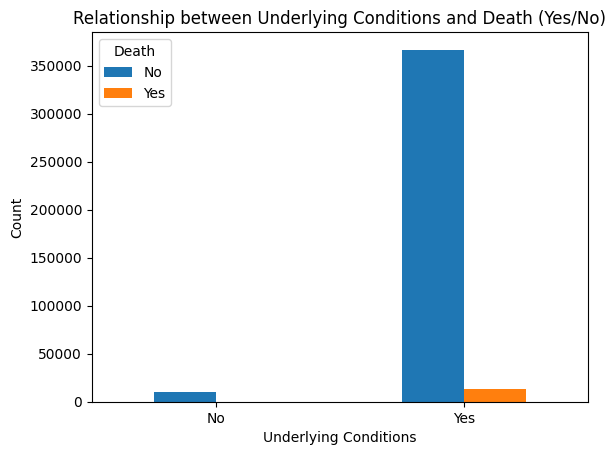

In [486]:
filtered_df = df[df['death_yn'].isin(['Yes', 'No'])]


filtered_df['underlying_conditions_yn'] = filtered_df['underlying_conditions_yn'].map({'Yes': 1, 'No': 0})
filtered_df['death_yn'] = filtered_df['death_yn']

group_counts = filtered_df.groupby(['underlying_conditions_yn', 'death_yn']).size().unstack()

group_counts.plot(kind='bar', stacked=False)
plt.title('Relationship between Underlying Conditions and Death (Yes/No)')
plt.xlabel('Underlying Conditions')
plt.ylabel('Count')
plt.legend(title='Death', labels=['No', 'Yes'], loc='upper left')
plt.xticks(rotation=0)
category_labels = {1: 'No', 2: 'Yes'}
plt.xticks(ticks=[0, 1], labels=[category_labels[i] for i in [1, 2]])
plt.show()




 Yes, hospitalized patients with underlying medical conditions and/or risk behaviors are more likely to die from COVID-19. The graph illustrates that the number of deceased individuals with underlying medical conditions and/or risk behaviors is greater, whereas the number of deceased individuals without underlying medical conditions and/or risk behaviors is zero 

2. Who are the people (the demographic segment) that appear to be most at risk of death due to COVID-19? Who is the least at risk?

2.1: Who is the Gender that appear to be most at risk of death due to COVID-19? Who is the least at risk?

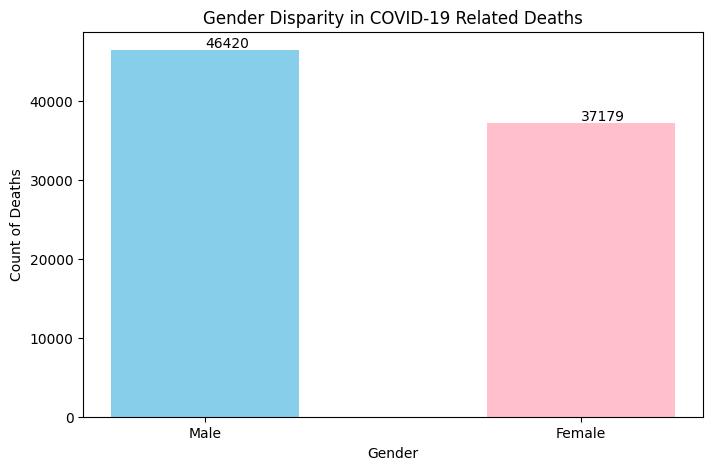

In [487]:

filtered_df_yes = df[df['death_yn'] == 'Yes']

grouped_data_yes_sex = filtered_df_yes['sex'].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))

genders = grouped_data_yes_sex.index.tolist()[:-2]  
counts = grouped_data_yes_sex.values[:-2]  


bar_width = 0.5


bars = ax.bar(genders, counts, color=['skyblue', 'pink'], width=bar_width)  


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')


ax.set_title('Gender Disparity in COVID-19 Related Deaths')  
ax.set_ylabel('Count of Deaths') 
ax.set_xlabel('Gender')

plt.show()


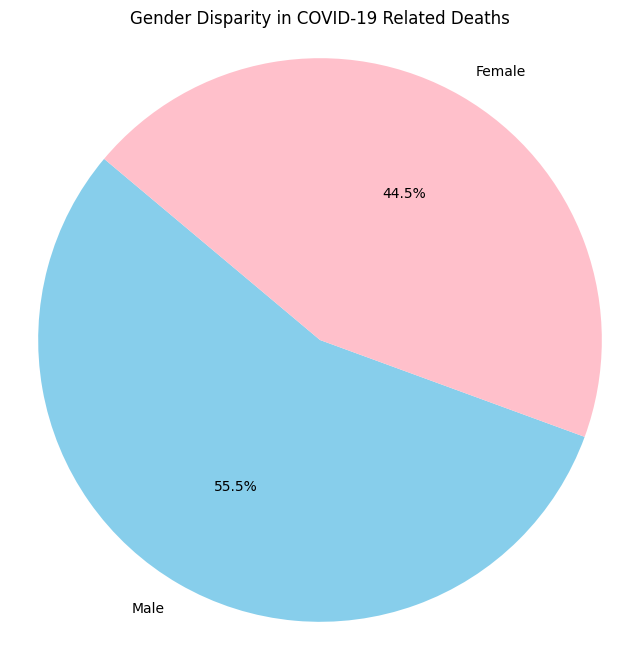

In [488]:




grouped_data_yes_sex = filtered_df_yes['sex'].value_counts()


fig, ax = plt.subplots(figsize=(8, 8))

colors = ['skyblue', 'pink']

# Create the pie chart
wedges, texts, autotexts = ax.pie(grouped_data_yes_sex.values[:-2], labels=grouped_data_yes_sex.index.tolist()[:-2], colors=colors, autopct='%1.1f%%', startangle=140)


ax.set_title('Gender Disparity in COVID-19 Related Deaths')  
ax.axis('equal') 

# Show the plot
plt.show()


The gender that appears to be most at risk of death due to COVID-19 is males, as indicated by the graph where the percentage of deceased males due to COVID-19 is 55.5%

2.2: Who is the race that appear to be most at risk of death due to COVID-19? Who is the least at risk?

The least at risk among races are  Multiple/Other :   108
The Most at risk among races are  White :   64328


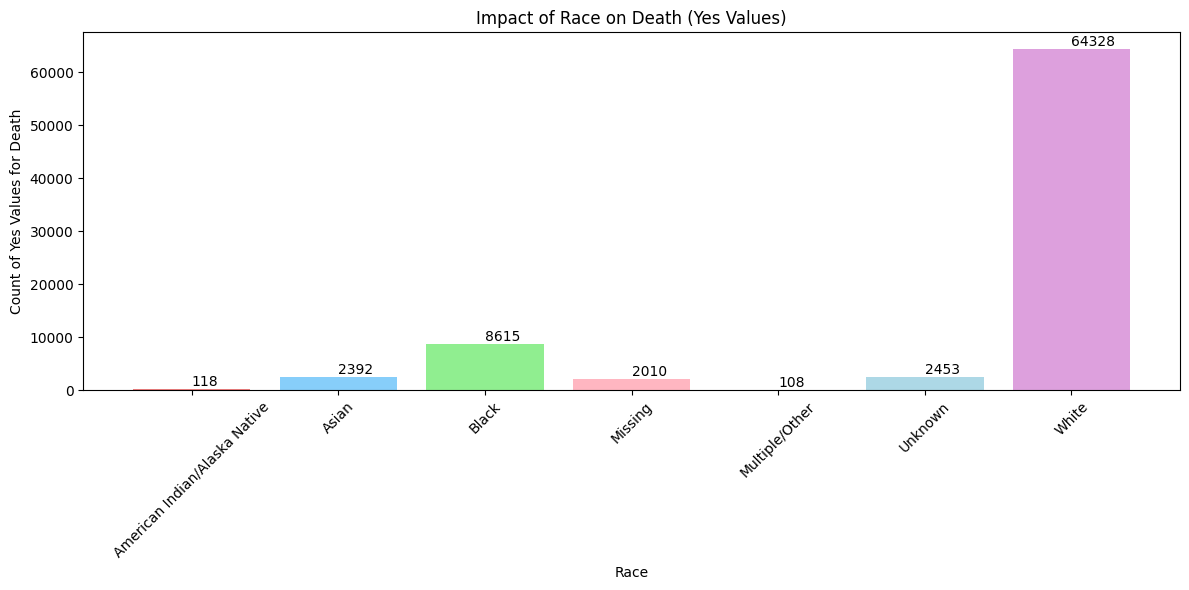

In [489]:


colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'khaki', 'lightblue', 'plum', 'lightgray', 'yellow']


grouped_data_yes_race = filtered_df_yes.groupby('race')['death_yn'].count()


print( 'The least at risk among races are ',grouped_data_yes_race.idxmin(),':  ',grouped_data_yes_race.min())
print( 'The Most at risk among races are ',grouped_data_yes_race.idxmax(),':  ',grouped_data_yes_race.max())


races = grouped_data_yes_race.index.tolist()
counts = grouped_data_yes_race.values

plt.figure(figsize=(12, 6)) 
bars = plt.bar(races, counts, color=colors)


plt.title('Impact of Race on Death (Yes Values)')
plt.ylabel('Count of Yes Values for Death')
plt.xlabel('Race')
plt.xticks(rotation=45) 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')


plt.tight_layout() 
plt.show()


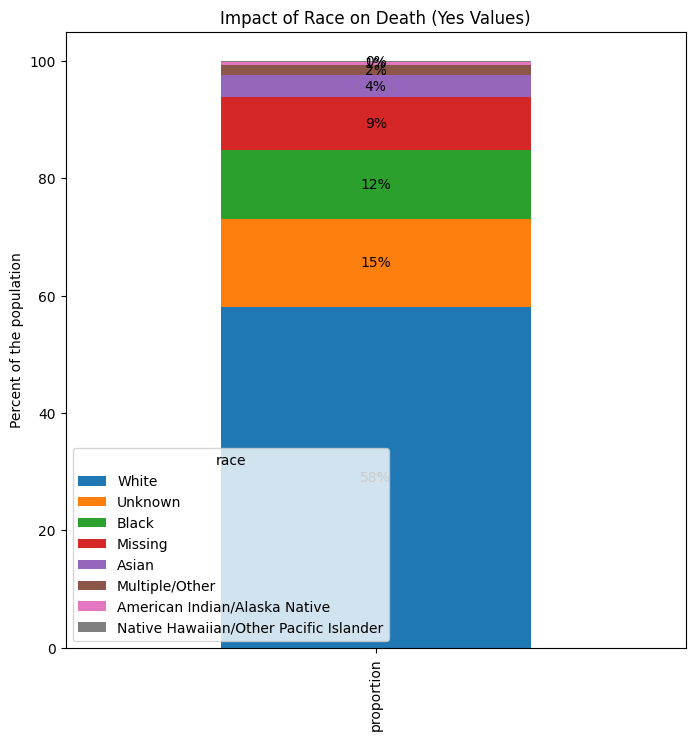

In [506]:

percent_distribution = df['race'].value_counts(normalize=True) * 100


percent_distribution_df = percent_distribution.to_frame().T
ax = percent_distribution_df.plot(kind='bar', stacked=True, figsize=(8, 8))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width / 2, y + height / 2), ha='center', va='center')


plt.ylabel('Percent of the population')
plt.title('Impact of Race on Death (Yes Values)')
plt.show()


The white race appears to be the most at risk of death due to COVID-19, as indicated by the graph showing that the percentage of deceased white individuals due to COVID-19 is 58%, totaling 64,328 cases. Conversely, the group least at risk are the Native Hawaiian/Other Pacific Islander, with the number of deaths being zero

2.3: what age demographic displays the highest susceptibility to mortality due to COVID-19, and conversely, which age group exhibits the lowest susceptibility to mortality?

Missing :   125


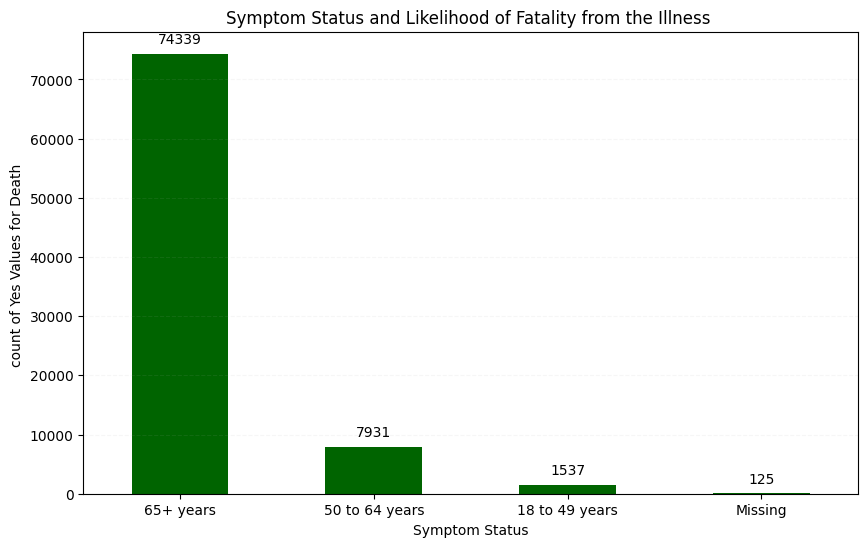

In [491]:

count_of_unique_valuesdeath_yn = filtered_df_yes['age_group'].value_counts()

value_name = count_of_unique_valuesdeath_yn.idxmin()

print(value_name,':  ',count_of_unique_valuesdeath_yn.min())


plt.figure(figsize=(10, 6))
ax = count_of_unique_valuesdeath_yn.plot(kind='bar', color='darkgreen')
plt.title(' ')
plt.xlabel('Symptom Status')
plt.ylabel('count of Yes Values for Death ')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.1)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

 In the population under 18 years of age, there were no reported deaths due to the COVID-19 virus. The incidence of mortality increases with advancing age, with individuals above 65 years being the most affected demographic group in terms of COVID-19 related deaths.  

3. What percent of patients who have reported exposure to any kind of travel / or congregation within the 14 days prior to illness onset end up hospitalized? What percent of those go on to be hospitalized?

In [492]:
exposure_yn = df[df['exposure_yn'] == 'Yes']

exposure_yn_count=exposure_yn.shape[0]
pesent_of_exposure_yn= (exposure_yn_count/ df.shape[0]) * 100

hosp_yn=exposure_yn[exposure_yn['hosp_yn'] == 'Yes']
hosp_yn_count=hosp_yn.shape[0]
pesent_of_hosp_yn= (hosp_yn_count/ exposure_yn_count) * 100
print('Percentage of patients exposed to travel or gathering before the onset of the disease =   ', pesent_of_exposure_yn,'%')
print('Hospitalization Rate for Patients with Prior Travel or Congregation  =   ', pesent_of_hosp_yn,'%')

Percentage of patients exposed to travel or gathering before the onset of the disease =    5.2510751033517655 %
Hospitalization Rate for Patients with Prior Travel or Congregation  =    3.9011618884567056 %


Yes :   38965


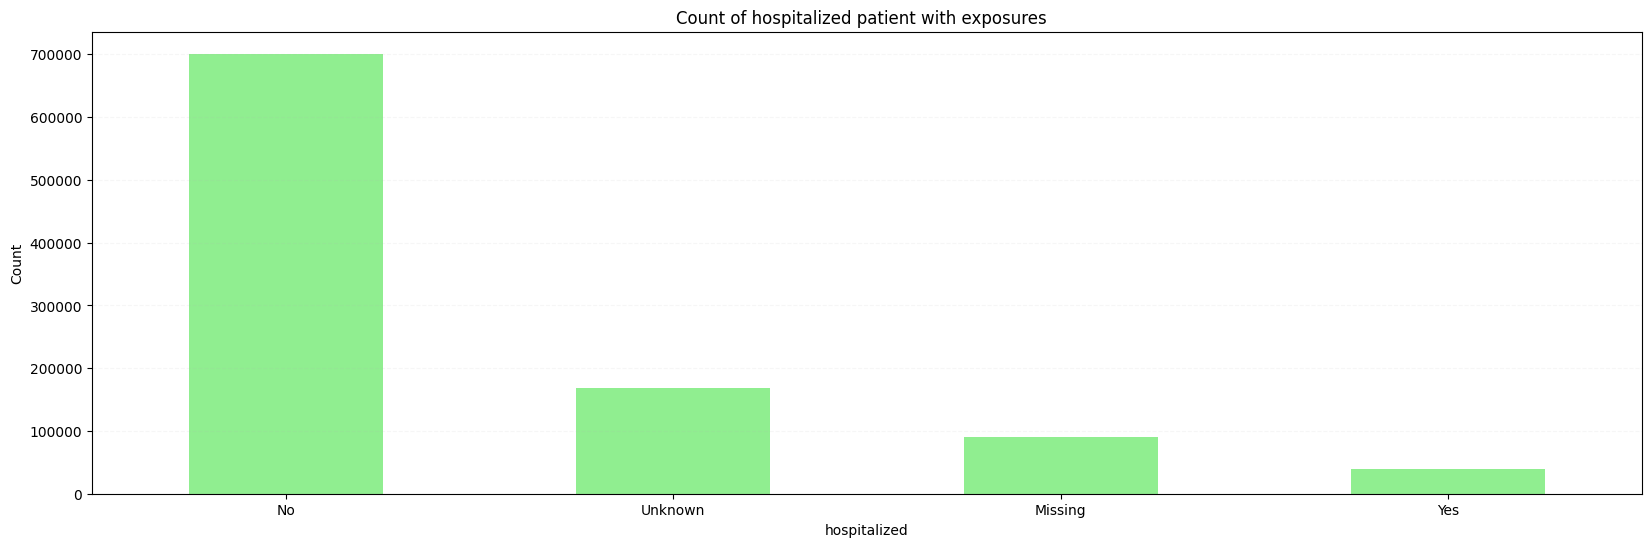

In [493]:
count_of_unique_valuesdeath_yn = exposure_yn['hosp_yn'].value_counts()
value_name = count_of_unique_valuesdeath_yn.idxmin()

print(value_name,':  ',count_of_unique_valuesdeath_yn.min())


plt.figure(figsize=(20, 6))
count_of_unique_valuesdeath_yn.plot(kind='bar', color='lightgreen')
plt.title('Count of hospitalized patient with exposures  ')
plt.xlabel('hospitalized')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.show()

From the graph, it is evident that a substantial number of patients who reported exposure to any kind of travel or congregation within the 14 days prior to illness onset were not hospitalized

4. Are Asymptomatic COVID patients less likely to be hospitalized? Are they
less likely to die from their illness?

Unknown :   563


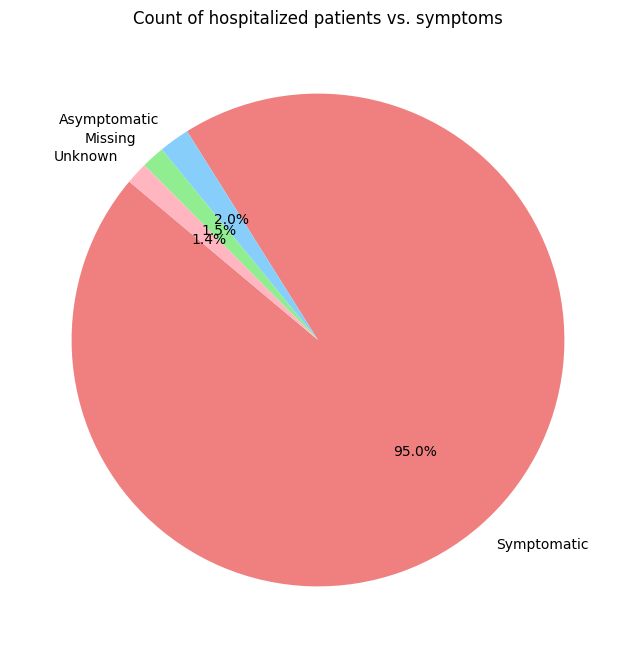

In [494]:


count_of_unique_valuesdeath_yn = hosp_yn['symptom_status'].value_counts()
value_name = count_of_unique_valuesdeath_yn.idxmin()

print(value_name,':  ',count_of_unique_valuesdeath_yn.min())


plt.figure(figsize=(8, 8)) 
plt.pie(count_of_unique_valuesdeath_yn, labels=count_of_unique_valuesdeath_yn.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Count of hospitalized patients vs. symptoms') 
plt.show()


Unknown :   563


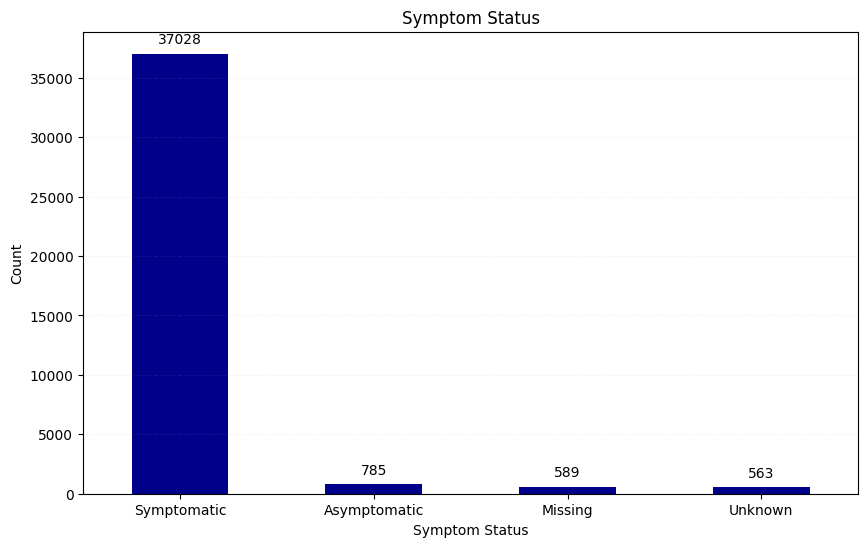

In [495]:


count_of_unique_valuesdeath_yn = hosp_yn['symptom_status'].value_counts()
value_name = count_of_unique_valuesdeath_yn.idxmin()

print(value_name,':  ',count_of_unique_valuesdeath_yn.min())

plt.figure(figsize=(10, 6))
ax = count_of_unique_valuesdeath_yn.plot(kind='bar', color='darkblue')
plt.title('Symptom Status')
plt.xlabel('Symptom Status')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.1)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()


Yes, based on the data presented in the graphs, it is evident that most of the hospitalized patients are symptomatic COVID cases, constituting 95% of the total number, which amounts to 37,028 individuals. In contrast, asymptomatic patients represent a smaller percentage of hospitalizations at 2%, totaling 785 individuals

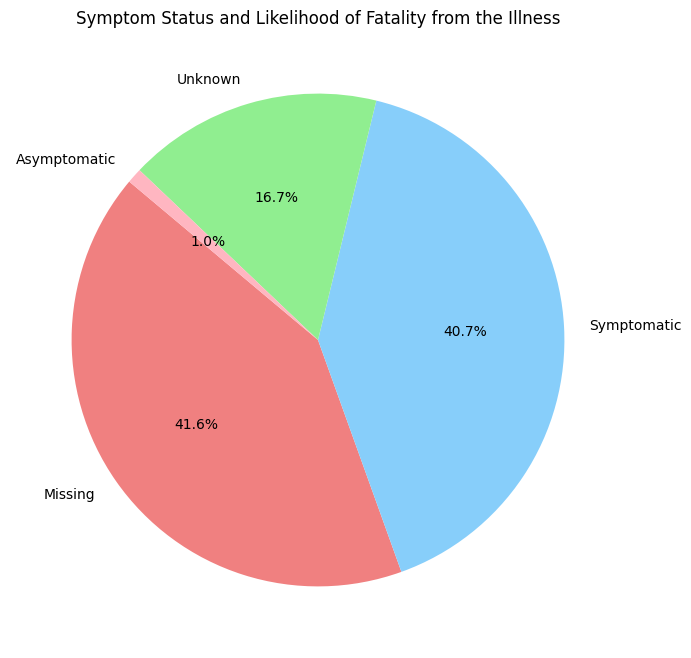

In [496]:


count_of_unique_valuesdeath_yn = filtered_df_yes['symptom_status'].value_counts()

value_name = count_of_unique_valuesdeath_yn.idxmin()

#print(value_name,':  ',count_of_unique_valuesdeath_yn.min())

plt.figure(figsize=(8, 8)) 
plt.pie(count_of_unique_valuesdeath_yn, labels=count_of_unique_valuesdeath_yn.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Symptom Status and Likelihood of Fatality from the Illness') 
plt.show()




Yes, based on the provided data, asymptomatic COVID patients are less likely to die from their illness. The analysis from the graph reveals that a higher percentage of deceased patients had symptomatic COVID, accounting for 40.7%, while the percentage of deceased patients who were asymptomatic is notably lower at 1%

5. Which state is associated with the highest percentage of Economic Impact
(stimulus) payments among survey respondents?

In [497]:
num_unique_res_states = df['res_state'].value_counts()
print(num_unique_res_states.idxmax(),num_unique_res_states.max())

CA 2306224


 California is associated with the highest percentage of Economic Impact Payments among survey respondents. This conclusion is drawn from the significant number of survey participants indicating California as their state of residence, suggesting a strong correlation with Economic Impact Payments

6.  What is the validity of ascertaining an individual's infection status without conducting a laboratory report? Can methods such as clinical assessment, routine surveillance, patient contact tracing, diverse assessment techniques, and alternative diagnostic approaches suffice to validate the presence of an infection?  

In [498]:

total_cases = df.groupby('process')['current_status'].count()

lab_confirmed_cases = df[df['current_status'] == 'Laboratory-confirmed case'].groupby('process')['current_status'].count()


percentage_lab_confirmed = (lab_confirmed_cases / total_cases) * 100

print(percentage_lab_confirmed )


process
Autopsy                            60.606061
Clinical evaluation                76.141757
Contact tracing of case patient    64.113668
Laboratory reported                84.359194
Missing                            81.782890
Multiple                           85.551572
Other                              54.175102
Provider reported                  79.617208
Routine physical examination       66.400000
Routine surveillance               88.382966
Unknown                            81.152637
Name: current_status, dtype: float64


ascertain an individual's infection status without resorting to a laboratory report. Routine surveillance demonstrates a high accuracy rate of 88.38%, while clinical evaluation shows a commendable accuracy level of 76.14%. Additionally, routine physical examination also exhibits a moderate accuracy at 66.4%, indicating the potential sufficiency of alternative diagnostic approaches in validating the presence of an infection

7. What factors contribute to the observed increase in the number of infections?  

LOS ANGELES :   699681


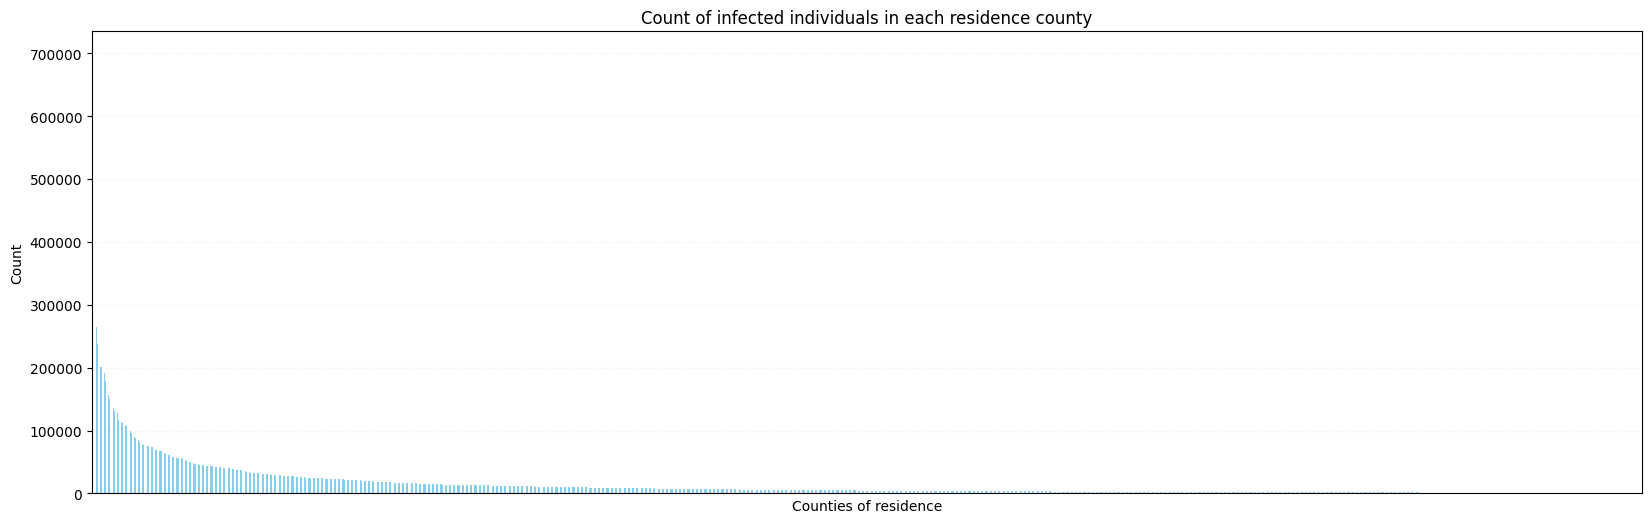

In [499]:
count_of_unique_values_res_county = df['res_county'].value_counts()
value_name = count_of_unique_values_res_county.idxmax()

print(value_name,':  ',count_of_unique_values_res_county.max())


# Plotting the count of unique values in the "underlying_conditions_yn"
plt.figure(figsize=(20, 6))
count_of_unique_values_res_county.plot(kind='bar', color='skyblue')
plt.title('Count of infected individuals in each residence county')
plt.xlabel('Counties of residence')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xticks([])  # Remove x-axis tick labels
plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.show()

 The graph illustrating the number of infected individuals in each residence province clearly demonstrates an exponential increase in the number of infected people due to the close spread of the infection.  

8. What is the mortality count of non-Hispanic or Latino individuals?



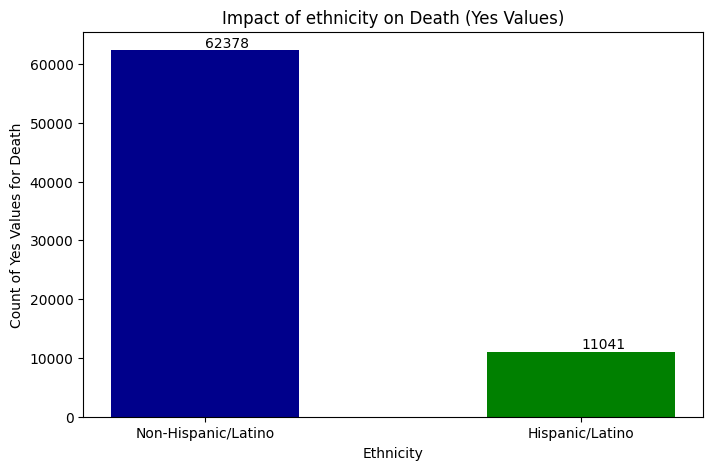

In [500]:



grouped_data_yes_ethnicity= filtered_df_yes['ethnicity'].value_counts()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 5))

# Define the data
genders = grouped_data_yes_ethnicity.index.tolist()[:-2]  # Exclude the last two values
counts = grouped_data_yes_ethnicity.values[:-2]  # Exclude the last two values

# Set the bar widths
bar_width = 0.5

# Create the bar plot
bars = ax.bar(genders, counts, color=['darkblue', 'green'], width=bar_width)

# Annotate each bar with the count value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

# Set the title and labels
ax.set_title('Impact of ethnicity on Death (Yes Values)')
ax.set_ylabel('Count of Yes Values for Death')
ax.set_xlabel('Ethnicity')

# Show the plot
plt.show()


The mortality count of non-Hispanic or Latino individuals is 62378 which is greater than Hispanic/Latino mortality count that is 11041

9. What is the percentage of individuals admitted to intensive care?



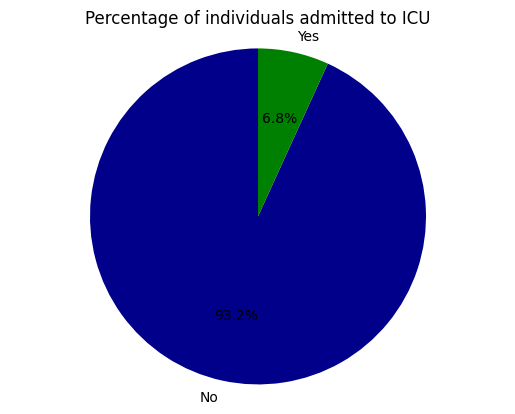

In [501]:


icu_yn = df['icu_yn'].value_counts()

icu_yn_= icu_yn.index.tolist()[2:]  
counts = icu_yn.values[2:] 


percentages = (counts / counts.sum()) * 100
labels = icu_yn_
fig, ax = plt.subplots()
ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkblue', 'green'])
ax.set_title('Percentage of individuals admitted to ICU')

ax.axis('equal')

plt.show()




 The chart suggests that a significant portion of infected individuals did not require intensive care, with only 6.8% of patients admitted. However, it is important to note the substantial presence of missing and unknown data in the initial dataset.  

10.  To what extent did intensive care significantly impact the reduction of the mortality rate – particularly focusing on the observed impact within the context of the provided data?  

Yes :  8584


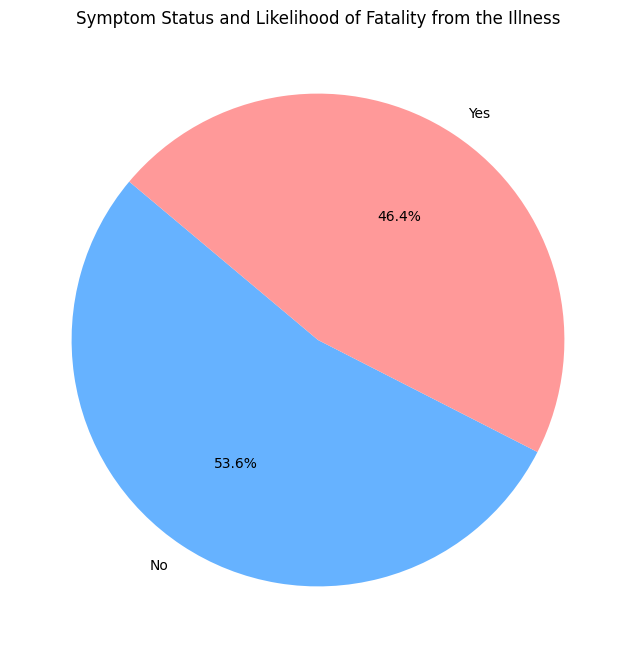

In [502]:

icu_yn = filtered_df[filtered_df['icu_yn'] == 'Yes']


count_of_unique_values_death_yn = icu_yn['death_yn'].value_counts()

value_name = count_of_unique_values_death_yn.idxmin()

# Print the least common outcome with its count
print(value_name, ': ', count_of_unique_values_death_yn.min())

# Define colors for the pie chart
colors = ['#66B2FF','#FF9999' ]

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_of_unique_values_death_yn, labels=count_of_unique_values_death_yn.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Symptom Status and Likelihood of Fatality from the Illness')

# Display the pie chart
plt.show()


The impact of intensive care on the reduction of the mortality rate was not deemed significant, considering the minimal disparity between the percentages of deceased and surviving individuals following admission to the intensive care unit, as illustrated in the chart .  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15108\1377833886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['icu_yn'] = filtered_df['icu_yn'].map({'Yes': 1, 'No': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15108\1377833886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['death_yn'] = filtered_df['death_yn'].map({'Yes': 1, 'No': 0})


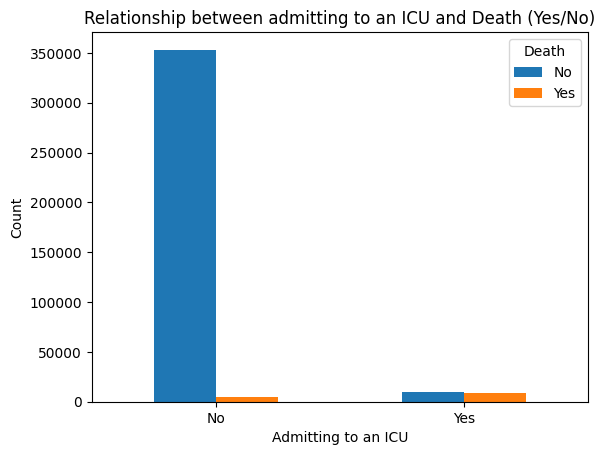

In [503]:
filtered_df = df[df['death_yn'].isin(['Yes', 'No'])]

filtered_df['icu_yn'] = filtered_df['icu_yn'].map({'Yes': 1, 'No': 0})
filtered_df['death_yn'] = filtered_df['death_yn'].map({'Yes': 1, 'No': 0})

group_counts = filtered_df.groupby(['icu_yn', 'death_yn']).size().unstack()


group_counts.plot(kind='bar', stacked=False)
plt.title('Relationship between admitting to an ICU and Death (Yes/No)')
plt.xlabel('Admitting to an ICU')
plt.ylabel('Count')
plt.legend(title='Death', labels=['No', 'Yes'], loc='upper right')
plt.xticks(rotation=0)
category_labels = {1: 'No', 2: 'Yes'}
plt.xticks(ticks=[0, 1], labels=[category_labels[i] for i in [1, 2]])
plt.show()




Yes :   84123


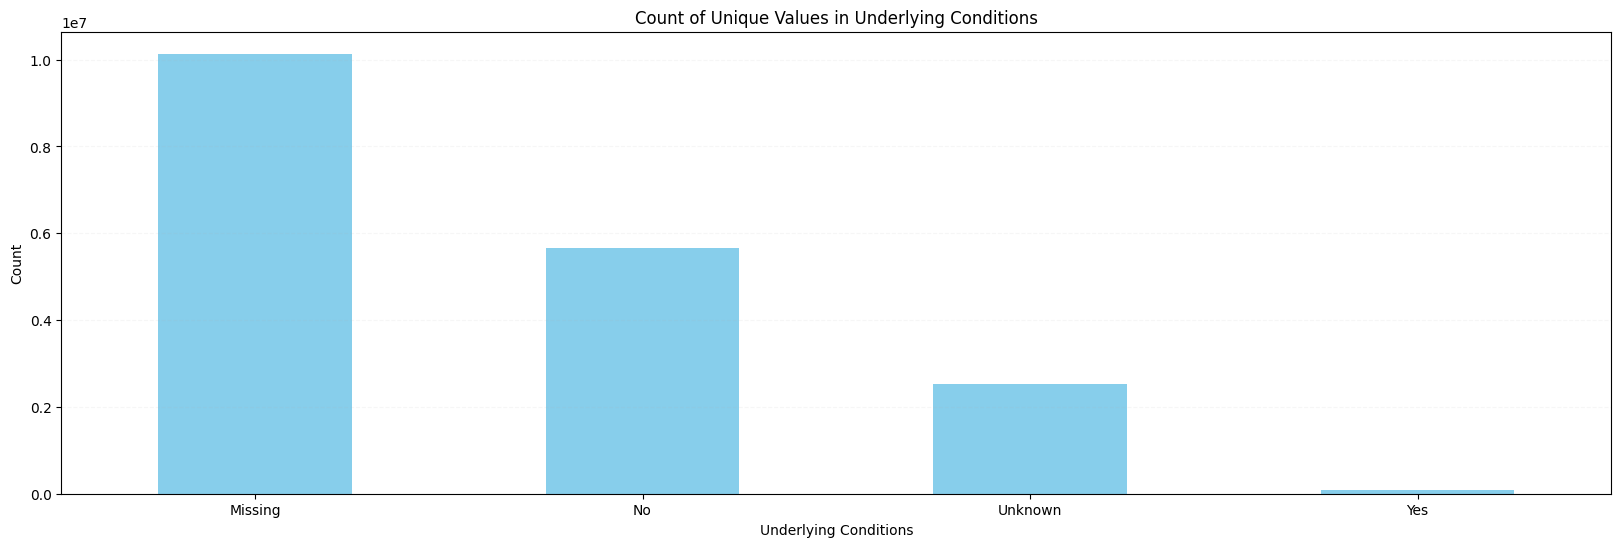

In [504]:
count_of_unique_valuesdeath_yn = df['death_yn'].value_counts()
value_name = count_of_unique_valuesdeath_yn.idxmin()

print(value_name,':  ',count_of_unique_valuesdeath_yn.min())

# Plotting the count of unique values in the "underlying_conditions_yn"
plt.figure(figsize=(20, 6))
count_of_unique_valuesdeath_yn.plot(kind='bar', color='skyblue')
plt.title('Count of Unique Values in Underlying Conditions')
plt.xlabel('Underlying Conditions')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.show()